# Доверительные интервалы.

## Задача 1

<div style="text-align: justify">
Сгенерируйте выборку $X_1, \ldots,X_{100}$ из распределения $P_\theta$ в теоретических задачах 6.1, 6.3, 6.4 и 6.5. В задачах 6.1, 6.3 и 6.4 возьмите $\theta = 10,$ в задаче 6.5 возьмите $(\theta, \lambda) = (10, 3).$ Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$ постройте доверительные интервалы, полученные теоретических задачах. Изобразите их на графиках в координатах $(n, \theta),$ используя matplotlib.pyplot.fill_between.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [2]:
n = 100
ns = np.arange(1, 101, 1)
theta = 10
lambda_param = 3.
alpha = 0.95
first_quantile = sts.norm.ppf((1 + alpha) / 2)
second_quantile = sts.norm.ppf((1 - alpha) / 2)

### Задача 6.1

Пусть $X_{1}, \ldots, X_{n}$ - выборка из равномерного распределения на отрезке $[0, \theta], \: \theta > 0$. Постройте доверительный интервал для $\theta$ уровня доверия $\alpha$, используя статистику а) $\overline{X}$, б) $X_{(1)}$, в) $X_{(n)}$.

In [3]:
#сгенерируем выборку из равномерного распределения на отрезке [0, theta]
uniform_sample = sts.uniform.rvs(loc = 0, scale = theta, size = n)

Для статистики $\overline{X}$ доверительный интервал уровня доверия $\alpha$: $T_{1}(X) = \frac{2 \overline{X} \sqrt{3n(1 - \alpha)}}{\sqrt{3n(1 - \alpha)} + 1}, \: T_{2}(X) = \frac{2 \overline{X} \sqrt{3n(1 - \alpha)}}{\sqrt{3n(1 - \alpha)} - 1}$.

In [4]:
def interval_lower_bound_uniform_1(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([2 * sample[:k].mean() * np.sqrt(3 * k * (1 - alpha)) / (np.sqrt(3 * k * (1 - alpha)) + 1)
                 for k in range(1, n + 1)])
    else:
        return 2 * sample[:(size)].mean() * np.sqrt(3 * size * (1 - alpha)) / (np.sqrt(3 * size * (1 - alpha)) + 1)

def interval_upper_bound_uniform_1(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([2 * sample[:k].mean() * np.sqrt(3 * k * (1 - alpha)) / (np.sqrt(3 * k * (1 - alpha)) - 1)
                 for k in range(1, n + 1)])
    else:
        return 2 * sample[:(size)].mean() * np.sqrt(3 * size * (1 - alpha)) / (np.sqrt(3 * size * (1 - alpha)) - 1)

In [5]:
#найдем доверительный интервал для статистики
T_1_a = interval_lower_bound_uniform_1(uniform_sample)
T_2_a = interval_upper_bound_uniform_1(uniform_sample)

Для статистики $X_{(1)}$ доверительный интервал уровня доверия $\alpha$: $T_{1}(X) = X_{(1)}, \: T_{2}(X) = \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}$.

In [6]:
def interval_lower_bound_uniform_2(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].min() for k in range(1, n + 1)])
    else:
        return sample[:(size)].min()

def interval_upper_bound_uniform_2(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].min() / (1 - alpha ** (1. / k)) for k in range(1, n + 1)])
    else:
        return sample[:(size)].min() / (1 - alpha ** (1. / size))

In [7]:
#найдем доверительный интервал для статистики
T_1_b = interval_lower_bound_uniform_2(uniform_sample)
T_2_b = interval_upper_bound_uniform_2(uniform_sample)

Для статистики $X_{(n)}$ доверительный интервал уровня доверия $\alpha$: $T_{1}(X) = \frac{(n + 1) X_{(n)}}{n + \sqrt{\frac{n}{(n + 2)(1 - \alpha)}}}, \: T_{2}(X) = \frac{(n + 1) X_{(n)}}{n - \sqrt{\frac{n}{(n + 2)(1 - \alpha)}}}$.

In [8]:
def interval_lower_bound_uniform_3(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([(k + 1) * sample[:k].max() / (k + np.sqrt(k / ((k + 2) * (1 - alpha)))) 
                 for k in range(1, n + 1)])
    else:
        return (size + 1) * sample[:(size + 1)].max() / (size + np.sqrt(size / ((size + 2) * (1 - alpha))))

def interval_upper_bound_uniform_3(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([(k + 1) * sample[:k].max() / (k - np.sqrt(k / ((k + 2) * (1 - alpha)))) 
                 for k in range(1, n + 1)])
    else:
        return (size + 1) * sample[:(size)].max() / (size - np.sqrt(size / ((size + 2) * (1 - alpha)))) 

In [9]:
#найдем доверительный интервал для статистики
T_1_c = interval_lower_bound_uniform_3(uniform_sample)
T_2_c = interval_upper_bound_uniform_3(uniform_sample)

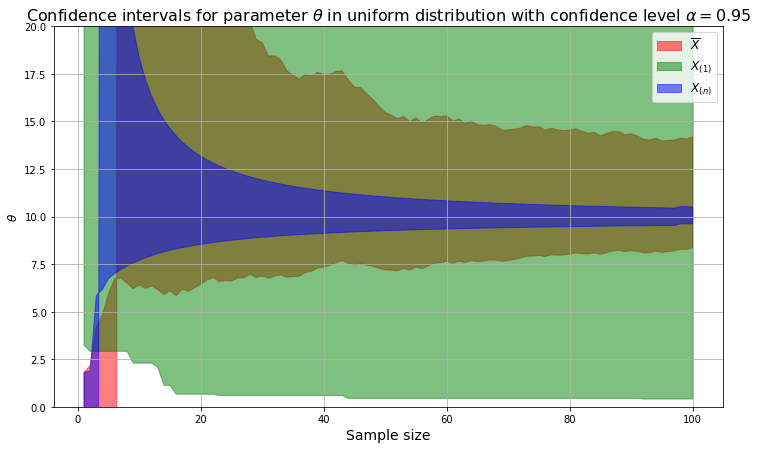

In [10]:
plt.figure(figsize = (12, 7))
plt.ylim(0, 20)
plt.fill_between(ns, T_1_a, T_2_a, color = 'r', alpha = 0.5, label = r'$\overline{X}$')
plt.fill_between(ns, T_1_b, T_2_b, color = 'g', alpha = 0.5, label = r'$X_{(1)}$')
plt.fill_between(ns, T_1_c, T_2_c, color = 'b', alpha = 0.5, label = r'$X_{(n)}$')
plt.title(r'Confidence intervals for parameter $\theta$ in uniform distribution with confidence level $\alpha = 0.95$',
         fontsize = 16)
plt.xlabel('Sample size', fontsize = 14)
plt.ylabel(r'$\theta$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12}, fontsize = 12)
plt.grid()
plt.show()

### Задача 6.3

Пусть $X_{1}, \ldots, X_{n}$ - выборка из распределения Коши со сдвигом, т.е. 
$$p_{\theta}(x) = \frac{1}{\pi (1 + (x - \theta)^{2})}.$$
Постройте асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$.

Асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$: $T_{1}^{(n)}(X_{1}, \ldots, X_{n}) = \overset{\wedge}{\mu} - \frac{\pi}{2 \sqrt{n}} u_{\frac{1 + \alpha}{2}}, \: T_{2}^{(n)}(X_{1}, \ldots, X_{n}) = \overset{\wedge}{\mu} + \frac{\pi}{2 \sqrt{n}} u_{\frac{1 + \alpha}{2}}$.

In [11]:
cauchy_sample = sts.cauchy.rvs(loc = theta, size = n)

In [12]:
def interval_lower_bound_cauchy(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([np.median(sample[:k]) - (np.pi * first_quantile) / (2 * np.sqrt(k)) 
                  for k in range(1, n + 1)])
    else:
        return np.median(sample[:(size)]) - (np.pi * first_quantile) / (2 * np.sqrt(size))

def interval_upper_bound_cauchy(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([np.median(sample[:k]) + (np.pi * first_quantile) / (2 * np.sqrt(k)) 
                  for k in range(1, n + 1)])
    else:
        return np.median(sample[:(size)]) + (np.pi * first_quantile) / (2 * np.sqrt(size))

In [13]:
T_1_cauchy = interval_lower_bound_cauchy(cauchy_sample)
T_2_cauchy = interval_upper_bound_cauchy(cauchy_sample)

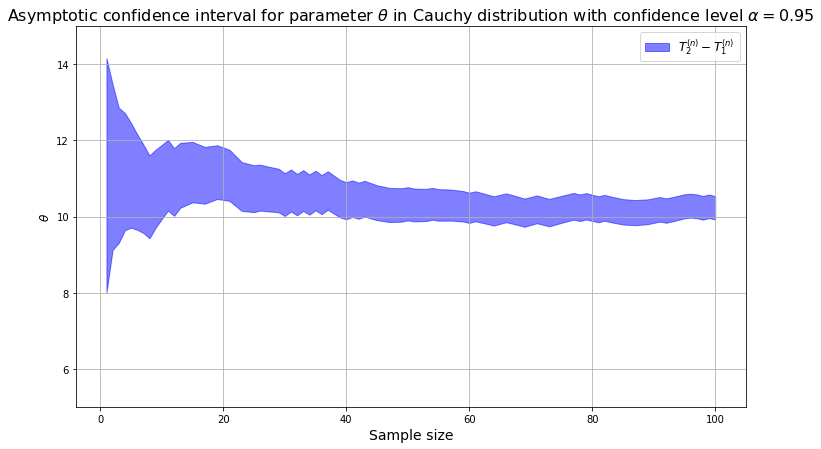

In [14]:
plt.figure(figsize = (12, 7))
plt.ylim(5, 15)
plt.fill_between(ns, T_1_cauchy, T_2_cauchy, color = 'b', alpha = 0.5, label = r'$T_{2}^{(n)} - T_{1}^{(n)}$')
plt.title(r'Asymptotic confidence interval for parameter $\theta$ in Cauchy distribution with confidence level $\alpha = 0.95$',
         fontsize = 16)
plt.xlabel('Sample size', fontsize = 14)
plt.ylabel(r'$\theta$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12}, fontsize = 12)
plt.grid()
plt.show()

### Задача 6.4

Пусть $X_{1}, \ldots, X_{n}$ - выборка из пуассоновского распределения с параметром $\theta$. Постройте асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$.

Асимпототический доверительный интервал для $\theta$ уровня доверия $\alpha$: $T_{1}^{(n)}(X_{1}, \ldots, X_{n}) = \overline{X} - u_{\frac{1 + \alpha}{2}} \sqrt{\frac{\overline{X}}{n}}, \: T_{2}^{(n)}(X_{1}, \ldots, X_{n}) = \overline{X} - u_{\frac{1 - \alpha}{2}} \sqrt{\frac{\overline{X}}{n}}$.

In [15]:
pois_sample = sts.poisson.rvs(mu = theta, size = n)

In [16]:
def interval_lower_bound_pois(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].mean() - first_quantile * np.sqrt(sample[:k].mean() / k) 
                  for k in range(1, n + 1)])
    else:
        return sample[:(size)].mean() - first_quantile * np.sqrt(sample[:(size)].mean() / size) 

def interval_upper_bound_pois(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].mean() - second_quantile * np.sqrt(sample[:k].mean() / k) 
                  for k in range(1, n + 1)])
    else:
        return sample[:(size)].mean() - second_quantile * np.sqrt(sample[:(size)].mean() / size) 

In [17]:
T_1_pois = interval_lower_bound_pois(pois_sample)
T_2_pois = interval_upper_bound_pois(pois_sample)

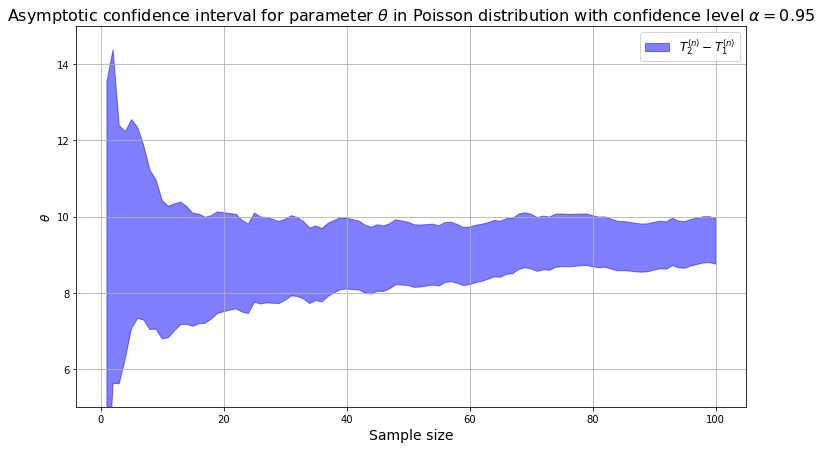

In [18]:
plt.figure(figsize = (12, 7))
plt.ylim(5, 15)
plt.fill_between(ns, T_1_pois, T_2_pois, color = 'b', alpha = 0.5, label = r'$T_{2}^{(n)} - T_{1}^{(n)}$')
plt.title(r'Asymptotic confidence interval for parameter $\theta$ in Poisson distribution with confidence level $\alpha = 0.95$',
         fontsize = 16)
plt.xlabel('Sample size', fontsize = 14)
plt.ylabel(r'$\theta$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12}, fontsize = 12)
plt.grid()
plt.show()

### Задача 6.5

Пусть $X_{1}, \ldots, X_{n}$ - выборка из гамма-распределения с параметрами $(\theta, \lambda)$. Постройте асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$, если а) $\lambda$ известно, б) $\lambda$ неизвестно.

Асимпотический доверительный интервал для $\theta$ уровня доверия $\alpha$, если $\lambda$ известно: 
$$T_{1}^{(n)}(X_{1}, \ldots, X_{n}) = \frac{\overline{X}}{\lambda} \left( 1 - \frac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n \lambda}} \right), \: T_{2}^{(n)}(X_{1}, \ldots, X_{n}) = \frac{\overline{X}}{\lambda} \left( 1 - \frac{u_{\frac{1 - \alpha}{2}}}{\sqrt{n \lambda}} \right).$$

Асимпотический доверительный интервал для $\theta$ уровня доверия $\alpha$, если $\lambda$ неизвестно: 
$$T_{1}^{(n)}(X_{1}, \ldots, X_{n}) = \frac{\text{Var}X}{\overline{X}} \left( 1 - \frac{u_{\frac{1 + \alpha}{2}}}{\overline{X}} \sqrt{\frac{\text{Var}X}{n}} \right), T_{2}^{(n)}(X_{1}, \ldots, X_{n}) = \frac{\text{Var}X}{\overline{X}} \left( 1 - \frac{u_{\frac{1 - \alpha}{2}}}{\overline{X}} \sqrt{\frac{\text{Var}X}{n}} \right).$$

In [19]:
gamma_sample = sts.gamma.rvs(a = lambda_param, scale = theta, size = n)

In [20]:
def interval_lower_bound_gamma_known(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].mean() / lambda_param * (1 - first_quantile / np.sqrt(k * lambda_param)) 
                       for k in range(1, n + 1)])
    else:
        return (sample[:(size)].mean() / lambda_param * (1 - first_quantile / np.sqrt(size * lambda_param))) 

def interval_upper_bound_gamma_known(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].mean() / lambda_param * (1 - second_quantile / np.sqrt(k * lambda_param)) 
                       for k in range(1, n + 1)])
    else:
        return (sample[:(size)].mean() / lambda_param * (1 - second_quantile / np.sqrt(size * lambda_param))) 

In [21]:
def interval_lower_bound_gamma_unknown(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].var() / sample[:k].mean() * (1 - (first_quantile / sample[:k].mean()) * np.sqrt(sample[:k].var() / k)) 
                             for k in range(1, n + 1)])
    else:
        return (sample[:(size)].var() / sample[:(size)].mean() * (1 - (first_quantile / sample[:(size)].mean()) * np.sqrt(sample[:(size)].var() / size)))

def interval_upper_bound_gamma_unknown(sample, size = None):
    n = sample.shape[0]
    if size is None:
        return np.array([sample[:k].var() / sample[:k].mean() * (1 - (second_quantile / sample[:k].mean()) * np.sqrt(sample[:k].var() / k)) 
                             for k in range(1, n + 1)])
    else:
        return (sample[:(size)].var() / sample[:(size)].mean() * (1 - (second_quantile / sample[:(size)].mean()) * np.sqrt(sample[:(size)].var() / size)))

In [22]:
T_1_gamma_a = interval_lower_bound_gamma_known(gamma_sample)
T_2_gamma_a = interval_upper_bound_gamma_known(gamma_sample)

In [23]:
T_1_gamma_b = interval_lower_bound_gamma_unknown(gamma_sample)
T_2_gamma_b = interval_upper_bound_gamma_unknown(gamma_sample)

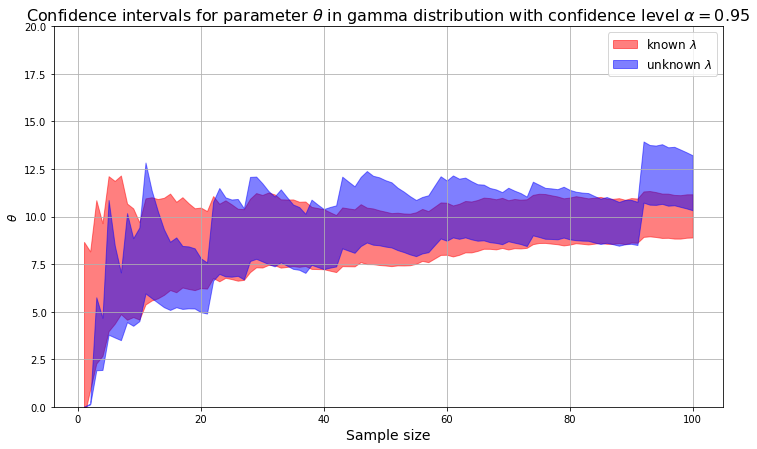

In [24]:
plt.figure(figsize = (12, 7))
plt.ylim(0, 20)
plt.fill_between(ns, T_1_gamma_a, T_2_gamma_a, color = 'r', alpha = 0.5, label = r'known $\lambda$')
plt.fill_between(ns, T_1_gamma_b, T_2_gamma_b, color = 'b', alpha = 0.5, label = r'unknown $\lambda$')
plt.title(r'Confidence intervals for parameter $\theta$ in gamma distribution with confidence level $\alpha = 0.95$',
         fontsize = 16)
plt.xlabel('Sample size', fontsize = 14)
plt.ylabel(r'$\theta$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12}, fontsize = 12)
plt.grid()
plt.show()

### Выводы

По построенным графикам можно сделать следующие выводы:  
__Задача 6.1.__ Доверительные интервалы для параметра $\theta$ в равномерном распределении, в которых были использованы статистики $\overline{X}$ и $X_{(n)}$, с увеличением размера выборки $n$ сходятся к истинному значению параметра $\theta = 10$, для статистики $X_{(1)}$ такого вывода сделать нельзя, так как сама оценка $X_{(1)}$ не является хорошей оценкой параметра $\theta$.  
__Задача 6.3.__ Построенный доверительный интервал для параметра $\theta$ в распределении Коши со сдвигом с увеличением размера выборки сходится к истинному значению параметра $\theta = 10$.  
__Задача 6.4.__ Построенный доверительный интервал для параметра $\theta$ в пуассоновском распределении с увеличением размера выборки сходится к истинному значению параметра $\theta = 10$.  
__Задача 6.5.__ Построенный доверительный интервал для параметра $\theta$ в гамма-распределении при известном значении параметра $\lambda$ с увеличением размера выборки сходится к истинному значению параметра $\theta = 10$. Если считать параметр $\lambda$ неизвестным, то построенный доверительный интервал не сходится так же, как и при известном $\lambda$. Возможно, он изначально посчитан неверно.

## Задача 2

<div style="text-align: justify">
Для $n = 100$ оцените вероятность попадания истинного значения $\theta$ в интервал (в каждой задаче). Для этого сгенерируйте достаточно много выборок (предложите, сколько нужно выборок), постройте по каждой из них интервалы и определите, сколько раз в интервалы попадает истинное значение $\theta.$ Таким способом будет построена бернуллиевская выборка, по ней оцените вероятность.
</div>

In [25]:
n = 100
num_samples = 10000
theta = 10.

In [26]:
def check_belonging_to_interval(theta, lower_bound, upper_bound):
    return np.logical_and(theta >= lower_bound, theta <= upper_bound)

In [27]:
def estimate_probability(flags):
    print('Оценка вероятности попадания истинного значения параметра в доверительный интервал: {}'.format(np.mean(flags)))

### Задача 6.1

In [28]:
uniform_samples = sts.uniform.rvs(loc = 0, scale = theta, size = (num_samples, n))

In [29]:
lower_1 = np.zeros(num_samples)
lower_2 = np.zeros(num_samples)
lower_3 = np.zeros(num_samples)
upper_1 = np.zeros(num_samples)
upper_2 = np.zeros(num_samples)
upper_3 = np.zeros(num_samples)

for i in range(num_samples):
    lower_1[i] = interval_lower_bound_uniform_1(uniform_samples[i], size = n)
    lower_2[i] = interval_lower_bound_uniform_2(uniform_samples[i], size = n)
    lower_3[i] = interval_lower_bound_uniform_3(uniform_samples[i], size = n)
    upper_1[i] = interval_upper_bound_uniform_1(uniform_samples[i], size = n)
    upper_2[i] = interval_upper_bound_uniform_2(uniform_samples[i], size = n)
    upper_3[i] = interval_upper_bound_uniform_3(uniform_samples[i], size = n)

__Оценка__ $\overline{X}$

In [30]:
belonging_flags_1 = check_belonging_to_interval(theta, lower_1, upper_1)
estimate_probability(belonging_flags_1)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 1.0


__Оценка__ $X_{(1)}$

In [31]:
belonging_flags_2 = check_belonging_to_interval(theta, lower_2, upper_2)
estimate_probability(belonging_flags_2)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.9532


__Оценка__ $X_{(n)}$

In [32]:
belonging_flags_3 = check_belonging_to_interval(theta, lower_3, upper_3)
estimate_probability(belonging_flags_3)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.9945


### Задача 6.3

In [33]:
cauchy_samples = sts.cauchy.rvs(loc = theta, size = (num_samples, n))

In [34]:
lower_bound = np.zeros(num_samples)
upper_bound = np.zeros(num_samples)

for i in range(num_samples):
    lower_bound[i] = interval_lower_bound_cauchy(cauchy_samples[i], size = n)
    upper_bound[i] = interval_upper_bound_cauchy(cauchy_samples[i], size = n)

In [35]:
belonging_flags = check_belonging_to_interval(theta, lower_bound, upper_bound)
estimate_probability(belonging_flags)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.9449


### Задача 6.4

In [36]:
pois_samples = sts.poisson.rvs(mu = theta, size = (num_samples, n))

In [37]:
lower_bound = np.zeros(num_samples)
upper_bound = np.zeros(num_samples)

for i in range(num_samples):
    lower_bound[i] = interval_lower_bound_pois(pois_samples[i], size = n)
    upper_bound[i] = interval_upper_bound_pois(pois_samples[i], size = n)

In [38]:
belonging_flags = check_belonging_to_interval(theta, lower_bound, upper_bound)
estimate_probability(belonging_flags)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.9533


### Задача 6.5

In [39]:
gamma_samples = sts.gamma.rvs(a = lambda_param, scale = theta, size = (num_samples, n))

__Параметр__ $\lambda$ __известен__

In [40]:
lower_bound = np.zeros(num_samples)
upper_bound = np.zeros(num_samples)

for i in range(num_samples):
    lower_bound[i] = interval_lower_bound_gamma_known(gamma_samples[i], size = n)
    upper_bound[i] = interval_upper_bound_gamma_known(gamma_samples[i], size = n)

In [41]:
belonging_flags = check_belonging_to_interval(theta, lower_bound, upper_bound)
estimate_probability(belonging_flags)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.9467


__Параметр__ $\lambda$ __неизвестен__

In [42]:
lower_bound = np.zeros(num_samples)
upper_bound = np.zeros(num_samples)

for i in range(num_samples):
    lower_bound[i] = interval_lower_bound_gamma_unknown(gamma_samples[i], size = n)
    upper_bound[i] = interval_upper_bound_gamma_unknown(gamma_samples[i], size = n)

In [43]:
belonging_flags = check_belonging_to_interval(theta, lower_bound, upper_bound)
estimate_probability(belonging_flags)

Оценка вероятности попадания истинного значения параметра в доверительный интервал: 0.4851


### Выводы

<div style="text-align: justify">
При генерации $10000$ выборок значения вероятности попадания истинного значения параметра $\theta$ в построенный доверительный интервал во всех задачах были приближенно равны $0.95$ или даже выше. Это говорит о том, что доверительные интервалы были построены верно, исходя из определения (уровень доверия был равен как раз $0.95$). Единственным исключением является интервал для параметра $\theta$ в гамма-распределении при неизвестном значении $\lambda$. Скорее всего доверительный интервал для такой ситуации построен неверно.
</div>